<a href="https://colab.research.google.com/github/hakidaova/MLF/blob/main/MLF_cv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans

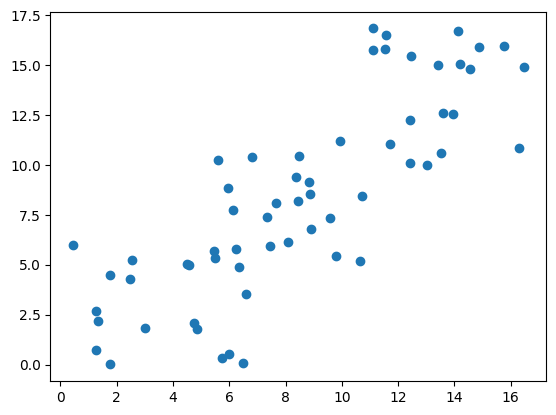

In [102]:
loaded_points = np.load('/k_mean_points.npy')

plt.figure()
plt.scatter(loaded_points[:,0],loaded_points[:,1])

In [103]:
k = 3

In [115]:
def initialize_clusters(points: np.ndarray, k_clusters: int) -> np.ndarray:
    """
    Initializes and returns k random centroids from the given dataset.

    :param points: Array of data points.
    :type: points ndarray with shape (n, 2)

    :param k_clusters: The number of clusters to form
    :type k_clusters: int


    :return: initial_clusters
    initial_clusters: Array of initialized centroids

    :rtype:
    initial_clusters: np.array (k_clusters, 2)
    :

    """

    ###################################
    # Write your own code here
    #points = np.random.shuffle(loaded_points)
    initial_clusters = points[np.random.choice(points.shape[0],k_clusters, replace = False)]

    ###################################

    return initial_clusters

In [116]:
ini = initialize_clusters(loaded_points,k)
print(ini)

[[ 5.4846864   5.3403198 ]
 [ 5.46249345  5.69923549]
 [14.13036356 16.72446994]]


In [117]:
def calculate_metric(points: np.ndarray, centroid: np.ndarray) -> np.ndarray:
    """
    Calculates the distance metric between each point and a given centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroid: A single centroid
    :type centroid: ndarray with shape (1, 2)

    :return: distances_array
    distances_array: Array of distances from point to centroid

    :rtype:
    distances_array: ndarray with shape (n,)
    :
    """

    ###################################
    # Write your own code here
    distances_array = np.linalg.norm(points - centroid, axis = 1)
    #distances_array = np.array([])


    ###################################

    return distances_array

In [118]:
distance = calculate_metric(loaded_points,ini[1,:])
print(distance)

[ 3.95759248  2.41661467  0.          0.35960117  1.19621665  5.0172431
  3.66684472  1.16878232  2.95491256  6.50470353  6.78267099  5.35732415
  4.5569066   5.68799854  5.15166559  5.41397348  3.30500274  3.88622067
  5.1692002   1.14741302  4.70609655  2.52546166  4.89221608  4.5651332
  4.4471806   4.83776994  2.15538441  5.93595206  3.25442249  3.87696845
  5.19741918  7.09343005  4.3323583   0.77715435  1.98774009  3.60927942
  3.20187419  5.64281935  4.43440067  2.66513575 12.4328944  14.35154708
 12.00104099 12.23725998 10.65366867 14.0245416  10.9020731   9.56876448
  9.41986445  8.23065996  8.72447292 12.79652523 12.86533929 11.52303045
 12.00168081 11.82309614 13.88792686 14.55037317 12.49581049  8.22644465]


In [121]:
def compute_distances(points: np.ndarray, centroids_points: np.ndarray) -> np.ndarray:
    """
    Computes and returns the distance from each point to each centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroids_points: A all centroid points
    :type centroids_points: ndarray with shape (k_clusters, 2)


    :return: distances_array
    distances_array: 2D array with distances of each point to each centroid.

    :rtype:
    distances_array: ndarray of shape (k_clusters, n)
    """
    ###################################
    # Write your own code here

    # Initialize an empty array to store distances
    distances_array = np.zeros((points.shape[0], centroids_points.shape[0]))

    # Loop through each centroid and calculate the distance from each point
    for i, centroid in enumerate(centroids_points):
        distances_array[:, i] = calculate_metric(points, centroid)
    ###################################

    return distances_array

In [122]:
distances = compute_distances(loaded_points,ini)
print(distances)

[[ 3.6072421   3.95759248 17.5831501 ]
 [ 2.09321735  2.41661467 15.17923816]
 [ 0.35960117  0.         14.0245416 ]
 [ 0.          0.35960117 14.29498542]
 [ 0.96954609  1.19621665 14.1669963 ]
 [ 5.07276863  5.0172431  17.38630711]
 [ 3.32063662  3.66684472 17.37624925]
 [ 1.02928888  1.16878232 15.14583517]
 [ 2.94595332  2.95491256 16.29936626]
 [ 6.2492547   6.50470353 20.52680934]
 [ 6.49716231  6.78267099 20.78836992]
 [ 4.99774795  5.35732415 18.40364239]
 [ 4.27173183  4.5569066  18.56513516]
 [ 5.33123207  5.68799854 18.28608116]
 [ 4.96981411  5.15166559 19.02659388]
 [ 5.20603749  5.41397348 19.36139262]
 [ 3.19201685  3.30500274 17.03576027]
 [ 3.81214452  3.88622067 17.38906656]
 [ 4.80996263  5.1692002  18.0930433 ]
 [ 0.99097938  1.14741302 15.14001565]
 [ 4.97960601  4.70609655  9.31847724]
 [ 2.76140044  2.52546166 11.5485594 ]
 [ 5.23248835  4.89221608  9.67190742]
 [ 4.92327024  4.5651332  10.6950689 ]
 [ 4.57375576  4.4471806  10.40460432]
 [ 5.08689115  4.83776994

In [123]:
def assign_centroids(distances: np.ndarray) -> np.ndarray:
    """
    Assigns each point to the closest centroid based on the distances.

    Parameters:
    :param distances: 2D array with distances of each point to each centroid.
    :type distances: ndarray with shape (k_clusters, n)

    :return: assigned_clusters
    assigned_clusters: Array indicating the closest centroid for each data point.

    :rtype:
    assigned_centroids: ndarray with shape (1, n) and dtype = np.int32
    """

    ###################################
    # Write your own code here #
    assigned_centroids = np.argmin(distances, axis=1)
    ###################################

    return assigned_centroids

In [125]:
assignment = assign_centroids(distances)
print(assignment)

[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 2 0 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [129]:
def calculate_objective(assigned_centroids: np.ndarray, distances: np.ndarray) -> np.ndarray:
    """
    Calculates and returns the objective function value for the clustering.

    Parameters:
    :param assigned_centroids: Array indicating the cluster assignment for each point.
    :type assigned_centroids: ndarray with shape (1, n) and and dtype = np.int64

    :param distances: 2D array with distances of each point to each centroid
    :type distances: ndarray with shape (k_clusters, n) and and dtype = np.float64

    :return: objective_function_value
    objective_function_value: Objective function value.

    :rtype:
    objective_function_value: float32


    """
    ###################################
    # Write your own code here #

    # Initialize the objective function value
    objective_function_value = 0.0

    # Iterate over each point and add the squared distance to its assigned centroid
    for i in range(len(assigned_centroids)):
        assigned_centroid_index = assigned_centroids[i]  # Get the index of the assigned centroid
        objective_function_value += distances[i, assigned_centroid_index]**2  # Add squared distance

    ###################################

    return objective_function_value

In [130]:
clustering = calculate_objective(assignment, distances)
print(clustering)

1006.2748608451491


In [134]:
def calculate_new_centroids(points: np.ndarray, assigned_centroids: np.ndarray, k_clusters: int) -> np.ndarray:
    """
    Computes new centroids based on the current cluster assignments.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param assigned_centroids: Array indicating the closest centroid for each data point.
    :type assigned_centroids: ndarray with shape (1, n) and dtype = np.int32


    :param k_clusters: Number of clusters.
    :type k_clusters: int


    :return: new_clusters
    new_clusters: new cluster points

    :rtype:
    new_clusters: ndarray with shape (1, n) and dtype = np.float32
    """

    ###################################
    # Write your own code here #

    # Initialize the new centroids array with shape (k_clusters, 2)
    new_clusters = np.zeros((k_clusters, points.shape[1]))

    # For each cluster, calculate the mean of the points assigned to it
    for i in range(k_clusters):
        # Get the indices of points assigned to the current cluster
        assigned_points = points[assigned_centroids == i]

        # If there are points assigned to this cluster, compute the mean
        if assigned_points.shape[0] > 0:
            new_clusters[i] = np.mean(assigned_points, axis=0)

    # new_clusters = np.array([])

    ###################################

    return new_clusters

In [136]:
new = calculate_new_centroids(loaded_points,assignment,k)
print(new)

[[ 4.55786854  3.04484483]
 [ 7.3375955   7.92891037]
 [13.24103172 13.81011385]]


In [143]:
def fit(points: np.ndarray, k_clusters: int, n_of_iterations: int, error: float = 0.001) -> tuple:
    """
    Fits the k-means clustering model on the dataset.

    Parameters:
    :param points : Array of data points.
    :type points: ndarray with shape (n, 2) and dtype = np.float32

    :param k_clusters:  Number of clusters
    :type k_clusters: int

    :param n_of_iterations:  Maximum number of iterations
    :type n_of_iterations: int


    :param error: Threshold for convergence.
    :type error: float

    :return: centroid_points, last_objective
    centroid_points: final centroid points
    last_objective: final objective funtion

    :rtype:
    centroid_points: ndarray with shape (k_clusters, 2) and dtype = np.float32
    last_objective: float

    """

    ###################################
    # Write your own code here #

    #centroid_points = np.array([])
    #last_objective = 10000.0

    #for _ in range(n_of_oterations):
     #   pass

    # Initialize centroids (you can use your `initialize_clusters` function here)
    centroid_points = initialize_clusters(points, k_clusters)

    last_objective = float('inf')

    for _ in range(n_of_iterations):
        # Step 1: Compute distances between points and centroids
        distances = compute_distances(points, centroid_points)

        # Step 2: Assign each point to the closest centroid
        assigned_centroids = assign_centroids(distances)

        # Step 3: Calculate new centroids based on the assignments
        new_centroids = calculate_new_centroids(points, assigned_centroids, k_clusters)

        # Step 4: Calculate the new objective function
        current_objective = calculate_objective(assigned_centroids, distances)

        # Step 5: Check for convergence (if the objective function doesn't change significantly)
        if abs(last_objective - current_objective) < error:
            break

        # Update last objective and centroids
        last_objective = current_objective
        centroid_points = new_centroids

    ###################################

    return centroid_points, last_objective

In [144]:
error = 0.001
n_of_oterations =25
final = fit(loaded_points, k,n_of_oterations, error)
print(final)

(array([[ 7.7822904 ,  7.52348016],
       [ 3.49184097,  2.70762529],
       [13.24103172, 13.81011385]]), 436.2519833332742)


In [ ]:
plt.figure()
plt.scatter(final[k],loaded_points[:,1])